# 梯度下降法的向量法

In [1]:
import numpy as np
from sklearn import datasets

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
boston = datasets.load_boston()
X = boston.data
y = boston.target

X = X[y < 50.0]
y = y[y < 50.0]

In [3]:
%run LinearRegression.py

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [6]:
lin_reg = LinearRegression()
%time lin_reg.fit_normal(X_train, y_train)
lin_reg.score(X_test, y_test)

CPU times: user 2.15 ms, sys: 1.07 ms, total: 3.21 ms
Wall time: 4.04 ms


0.8009390227581116

## 使用梯度下降法

In [7]:
lin_reg2 = LinearRegression()

In [8]:
lin_reg2.fit_gd(X_train, y_train)

/home/apollo3d/tf/jupyter_home/machine learning/Python3 入门机器学习（bobo）/第6章 梯度下降法/LinearRegression.py:35: RuntimeWarning: overflow encountered in multiply
  return X_b.T.dot(X_b.dot(theta)-y)*2/len(y)


LinearRegression()

In [9]:
lin_reg2.coef_

nan

In [10]:
X_train[:10]

array([[9.2520e-02, 3.0000e+01, 4.9300e+00, 0.0000e+00, 4.2800e-01,
        6.6060e+00, 4.2200e+01, 6.1899e+00, 6.0000e+00, 3.0000e+02,
        1.6600e+01, 3.8378e+02, 7.3700e+00],
       [8.6640e-02, 4.5000e+01, 3.4400e+00, 0.0000e+00, 4.3700e-01,
        7.1780e+00, 2.6300e+01, 6.4798e+00, 5.0000e+00, 3.9800e+02,
        1.5200e+01, 3.9049e+02, 2.8700e+00],
       [2.8750e-02, 2.8000e+01, 1.5040e+01, 0.0000e+00, 4.6400e-01,
        6.2110e+00, 2.8900e+01, 3.6659e+00, 4.0000e+00, 2.7000e+02,
        1.8200e+01, 3.9633e+02, 6.2100e+00],
       [7.1650e-02, 0.0000e+00, 2.5650e+01, 0.0000e+00, 5.8100e-01,
        6.0040e+00, 8.4100e+01, 2.1974e+00, 2.0000e+00, 1.8800e+02,
        1.9100e+01, 3.7767e+02, 1.4270e+01],
       [4.0110e-02, 8.0000e+01, 1.5200e+00, 0.0000e+00, 4.0400e-01,
        7.2870e+00, 3.4100e+01, 7.3090e+00, 2.0000e+00, 3.2900e+02,
        1.2600e+01, 3.9690e+02, 4.0800e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e

eta过大

In [11]:
lin_reg2.fit_gd(X_train, y_train, eta=0.000001)

LinearRegression()

In [12]:
lin_reg2.score(X_test, y_test)

0.30334492611229413

eta过小

----

In [13]:
%time lin_reg2.fit_gd(X_train, y_train, eta=0.000001, n_iters=1e6)

CPU times: user 17.4 s, sys: 0 ns, total: 17.4 s
Wall time: 17.4 s


LinearRegression()

In [14]:
lin_reg2.score(X_test, y_test)

0.737942001474466

## 使用梯度下降法前进行数据归一化

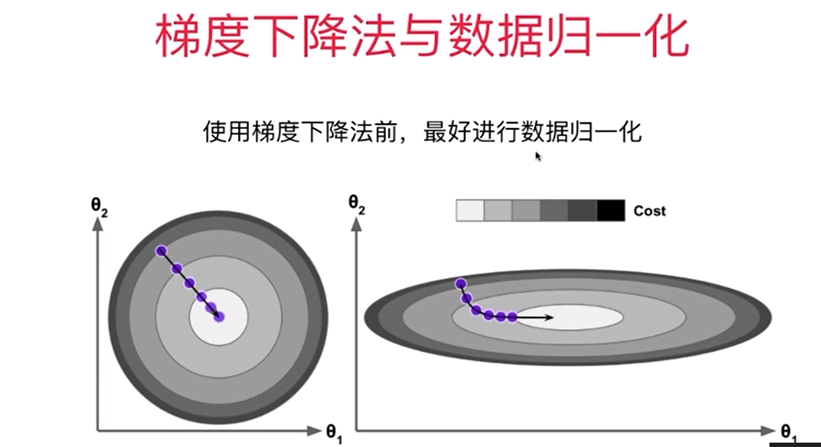

In [15]:
from sklearn.preprocessing import StandardScaler

In [19]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
standardScaler.fit(X_test)

StandardScaler()

In [20]:
X_train_standard = standardScaler.transform(X_train)
X_test_standard = standardScaler.transform(X_test)

In [18]:
lin_reg3 = LinearRegression()
%time lin_reg3.fit_gd(X_train_standard, y_train)

CPU times: user 166 ms, sys: 1.98 ms, total: 168 ms
Wall time: 167 ms


LinearRegression()

In [21]:
lin_reg3.score(X_test_standard, y_test)

0.7992479506902752

## 梯度下降法的优势

In [22]:
m = 1000
n = 5000

big_X = np.random.normal(size=(m, n))

true_theta = np.random.uniform(0.0, 100.0, size=n+1)
big_y = big_X.dot(true_theta[1:])+true_theta[0]+np.random.normal(0., 10., size=m)

In [31]:
big_reg = LinearRegression()
%time big_reg.fit_normal(big_X, big_y)

CPU times: user 8.13 s, sys: 576 ms, total: 8.71 s
Wall time: 8.71 s


LinearRegression()

In [30]:
big_reg2 = LinearRegression()
%time big_reg2.fit_gd(big_X, big_y)

CPU times: user 1min 3s, sys: 25.5 ms, total: 1min 3s
Wall time: 1min 3s


LinearRegression()

In [28]:
print(big_reg.coef_)
print(big_reg2.coef_)

[2981983.9884737  5670956.81783579 2353436.74232015 ... -124545.16708813
 1022333.79659576   34981.00629713]
-11.385426598378332


In [29]:
big_reg.coef_

array([2981983.9884737 , 5670956.81783579, 2353436.74232015, ...,
       -124545.16708813, 1022333.79659576,   34981.00629713])